<font size="10">**Assignment 7 – EDA**</font>

<font size="5">**Import the attached CSV files (IPL_Dataset.csv) and answer the following questions:**</font>

In [376]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [378]:
df=pd.read_csv('C:/Users/under/Downloads/IPL_Dataset.csv')

<font size="5">**Cleaning the Dataframe**</font>

In [381]:
print(df.isnull().sum()) #checking for missing values

Jersey No        0
Player           0
Matches          0
Inns             0
Not Out          0
Runs             0
Highest Score    0
Avg              0
Balls faced      0
Strike rate      0
100              0
50               0
4s               0
6s               0
dtype: int64


In [383]:
print("Duplicate rows:", df.duplicated().sum()) #checking for duplicate rows

Duplicate rows: 0


In [385]:
print(df.dtypes)

Jersey No          int64
Player            object
Matches            int64
Inns               int64
Not Out            int64
Runs               int64
Highest Score     object
Avg              float64
Balls faced        int64
Strike rate      float64
100                int64
50                 int64
4s                 int64
6s                 int64
dtype: object


In [387]:
if "Jersey No" in df.columns: #Removing Unnecessary Column ('Jersey No')
    df.drop(columns=["Jersey No"], inplace=True)

In [389]:
df.reset_index(drop=True, inplace=True)

<font size="5">**Q1. What is the maximum number of matches played by an individual player in a season? Print the player name along with the number of matched played.**</font>

In [392]:
max_matches = df["Matches"].max()
player_max_matches = df[df["Matches"] == max_matches][["Player", "Matches"]]
print("Players with maximum matches played:")
print(player_max_matches)

Players with maximum matches played:
            Player  Matches
1   Shikhar Dhawan       17
3     Shreyas Iyer       17
19  Marcus Stoinis       17
67   Kagiso Rabada       17


<font size="5">**Q2. Top 2 players with maximum Average who have scored atleast 2 half centuries ?**</font>

In [395]:
top_avg_players = df[df["50"] >= 2].nlargest(2, "Avg")[["Player", "Avg"]] 
print("\nTop 2 players with max average & 2+ half-centuries:")
print(top_avg_players)


Top 2 players with max average & 2+ half-centuries:
             Player    Avg
36  Wriddhiman Saha  71.33
4      Ishan Kishan  57.33


<font size="5">**Q3. Create 2 new columns based on Player name. First column will have first name and second column will have last name. Eg: for the player Shikhar Dhawan, Shikhar will be the first name and Dhawan will be the last name.**</font>

In [398]:
df["First Name"] = df["Player"].apply(lambda x: x.split(" ")[0])
df["Last Name"] = df["Player"].apply(lambda x: " ".join(x.split(" ")[1:]))
print(df[["First Name","Last Name"]].head())

  First Name Last Name
0         KL     Rahul
1    Shikhar    Dhawan
2      David    Warner
3    Shreyas      Iyer
4      Ishan    Kishan


<font size="5">**Q4. Create a new column (Cleaned_Highest_score) based on Highest score variable. Remove the Asterik(*) mark and convert the data type into INT.**</font>

In [401]:
import re
df["Highest Score"] = df["Highest Score"].astype(str)
df["Cleaned_Highest_score"] = pd.to_numeric(
    df["Highest Score"].str.replace(re.escape("*"), "", regex=True),
    errors="coerce").fillna(0).astype(int)
print(df[["Highest Score", "Cleaned_Highest_score"]].head())

  Highest Score  Cleaned_Highest_score
0          132*                    132
1          106*                    106
2           85*                     85
3           88*                     88
4            99                     99


<font size="5">**Q5. Print the total number of centuries scored in the entire season.**</font>

In [404]:
total_centuries = int(df["100"].sum())

print("Total Centuries in the Dataset:", total_centuries)


Total Centuries in the Dataset: 5


<font size="5">**Q6. Print all the player names whose strike rate is less than the average strike rate of all players in entire season. Print the player name, his strike rate and average strike rate.**</font>

In [407]:
average_strike_rate = df["Strike rate"].mean()
low_strike_rate_players = df[df["Strike rate"] < average_strike_rate][["Player", "Strike rate"]]
print("\nPlayers with strike rate below average:")
print(low_strike_rate_players)


Players with strike rate below average:
                  Player  Strike rate
51        Ajinkya Rahane       105.60
55         Glenn Maxwell       101.88
58         Vijay Shankar       101.04
61         Josh Philippe       101.29
62       Gurkeerat Singh        88.75
65          Kedar Jadhav        93.93
70      Yashasvi Jaiswal        90.90
71         Shreyas Gopal        94.87
77          Murali Vijay        74.41
79          Chris Jordan        93.54
80         Navdeep Saini       100.00
82     Kamlesh Nagarkoti        70.96
84         Harshal Patel        87.50
85         Jimmy Neesham       105.55
86            Tom Banton        90.00
89     Prabhsimran Singh       100.00
92         Kuldeep Yadav        61.90
94             Moeen Ali        75.00
95        Sandeep Sharma        80.00
96        Shardul Thakur        57.14
98           Rinku Singh       100.00
99           Shivam Mavi        71.42
100  Varun Chakaravarthy        66.66
101       Jaydev Unadkat        69.23
102      

<font size="5">**Q7. Please check the correlation between the features and create a heat map.**</font>

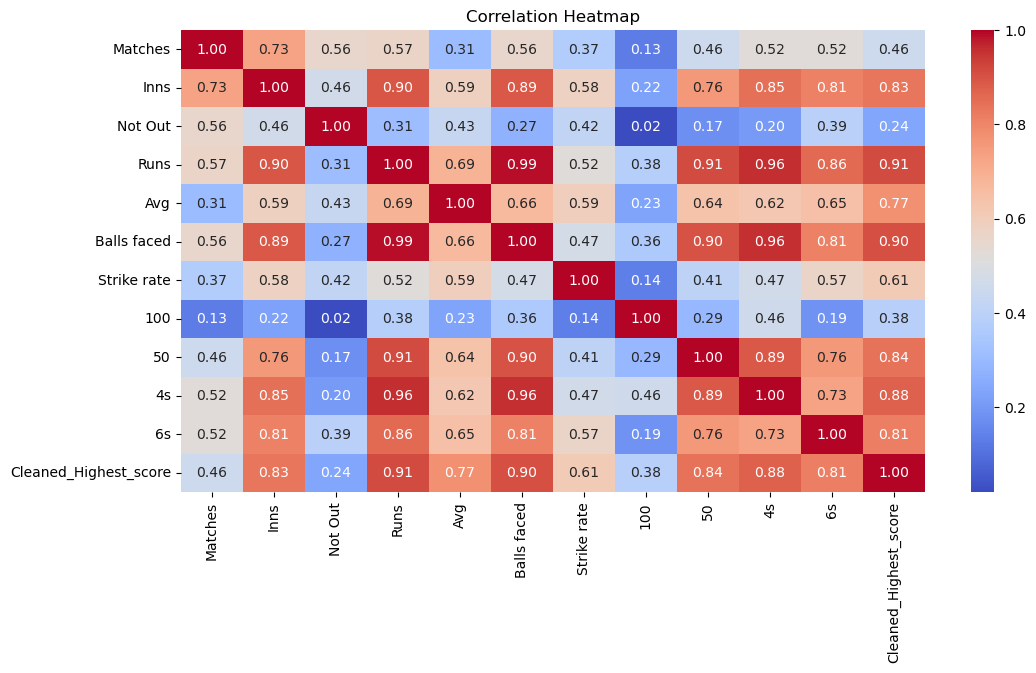

In [410]:
numeric_df = df.select_dtypes(include=["number"])
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

<font size="5">**Q8. Check the list of players who has an average greater than 50 as well strike rate above 120. Print player name, average and strike rate.**</font>

In [413]:
high_avg_strike_players = df[(df["Avg"] > 50) & (df["Strike rate"] > 120)][["Player", "Avg", "Strike rate"]]
print("\nPlayers with Avg > 50 and Strike Rate > 120:")
print(high_avg_strike_players)


Players with Avg > 50 and Strike Rate > 120:
             Player     Avg  Strike rate
0          KL Rahul   55.83       129.34
4      Ishan Kishan   57.33       145.76
31   Kieron Pollard   53.60       191.42
36  Wriddhiman Saha   71.33       139.86
37  Ruturaj Gaikwad   51.00       120.71
57     Deepak Hooda  101.00       142.25
60       Tom Curran   83.00       133.87


<font size="5">**Q9. Please check the list of players who has an average greater than 40 and balls faced above 100. Print player name, average and balls faced.**</font>

In [416]:
high_avg_balls_players = df[(df["Avg"] > 40) & (df["Balls faced"] > 100)][["Player", "Avg", "Balls faced"]]
print("\nPlayers with Avg > 40 and Balls Faced > 100:")
print(high_avg_balls_players)


Players with Avg > 40 and Balls Faced > 100:
             Player    Avg  Balls faced
0          KL Rahul  55.83          518
1    Shikhar Dhawan  44.14          427
4      Ishan Kishan  57.33          354
8       Virat Kohli  42.36          384
9      ABD Villiers  45.40          286
10    Faf Duplessis  40.81          319
14      Eoin Morgan  41.80          302
24  Kane Williamson  45.28          237
27      Chris Gayle  41.14          210
28       Ben Stokes  40.71          200
31   Kieron Pollard  53.60          140
32    Rahul Tewatia  42.50          183
33  Ravindra Jadeja  46.40          135
36  Wriddhiman Saha  71.33          153
37  Ruturaj Gaikwad  51.00          169


 <font size="5">**Q10. Players who scored atleast one century in this season. Create visualization.**</font>

C:\Users\under\AppData\Local\Temp\ipykernel_2336\2590161105.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Player", y="100", data=century_players, palette="coolwarm")


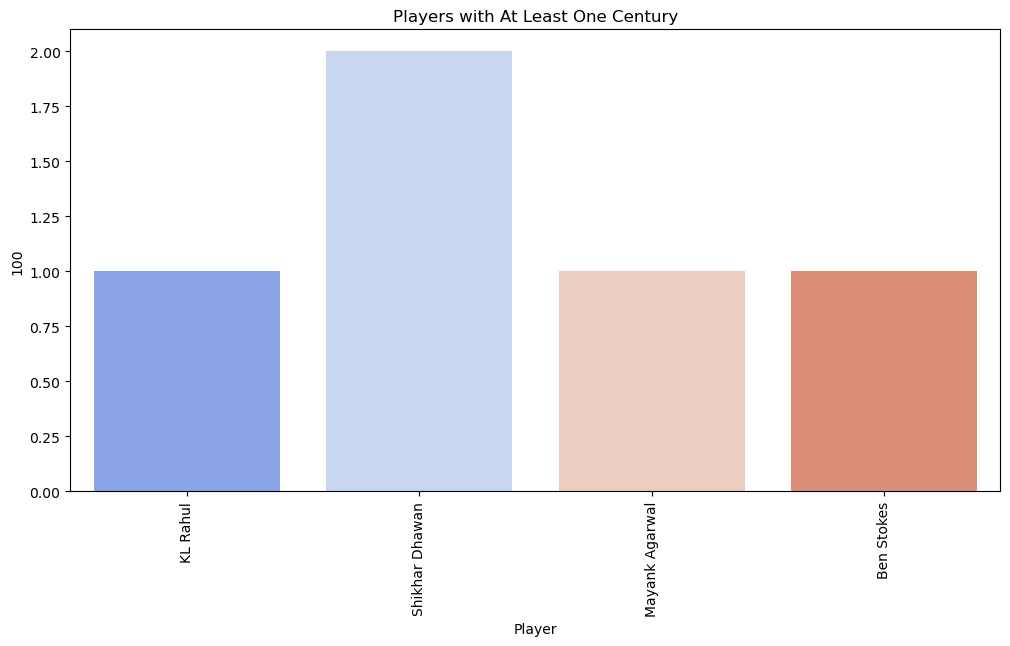

In [419]:
century_players = df[df["100"] >= 1][["Player", "100"]]
plt.figure(figsize=(12, 6))
sns.barplot(x="Player", y="100", data=century_players, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Players with At Least One Century")
plt.show()

<font size="5">**Q11. Players who scored atleast 4 half centuries in this season.**</font>

In [422]:
half_century_players = df[df["50"] >= 4][["Player", "50"]]
print("\nPlayers with at least 4 half-centuries:")
print(half_century_players)


Players with at least 4 half-centuries:
              Player  50
0           KL Rahul   5
1     Shikhar Dhawan   4
2       David Warner   4
4       Ishan Kishan   4
5       Quinton Kock   4
6   Suryakumar Yadav   4
7   Devdutt Padikkal   5
9       ABD Villiers   5
10     Faf Duplessis   4


<font size="5">**Q12. Check the list of players who hit more than 45 boundaries and more than 10 sixes in this season.**</font>

In [425]:
boundary_six_players = df[(df["4s"] > 45) & (df["6s"] > 10)][["Player", "4s", "6s"]]
print("\nPlayers with more than 45 boundaries & 10 sixes:")
print(boundary_six_players)


Players with more than 45 boundaries & 10 sixes:
             Player  4s  6s
0          KL Rahul  58  23
1    Shikhar Dhawan  67  12
2      David Warner  52  14
5      Quinton Kock  46  22
6  Suryakumar Yadav  61  11


<font size="5">**Q13. Plot a histogram of number of matches played in a season by players.**</font>

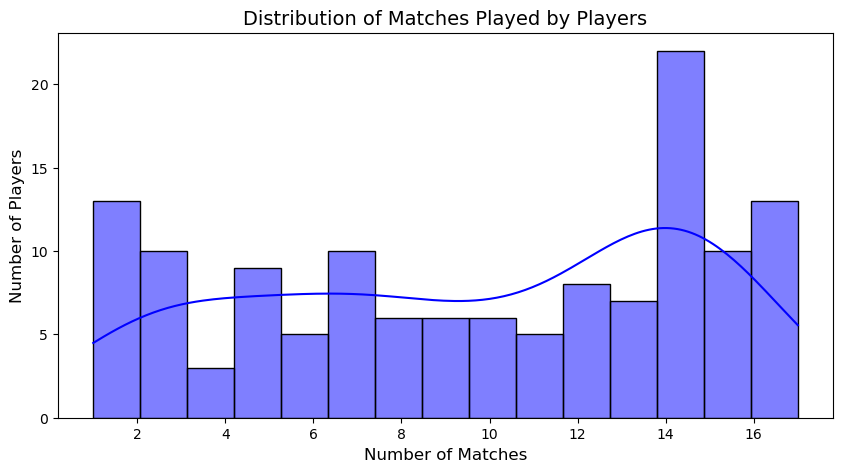

In [428]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Matches"], bins=15, kde=True, color="blue")
plt.title("Distribution of Matches Played by Players", fontsize=14)
plt.xlabel("Number of Matches", fontsize=12)
plt.ylabel("Number of Players", fontsize=12)
plt.show()

<font size="5">**Q14. Plot the histogram of balls faced by players.**</font>

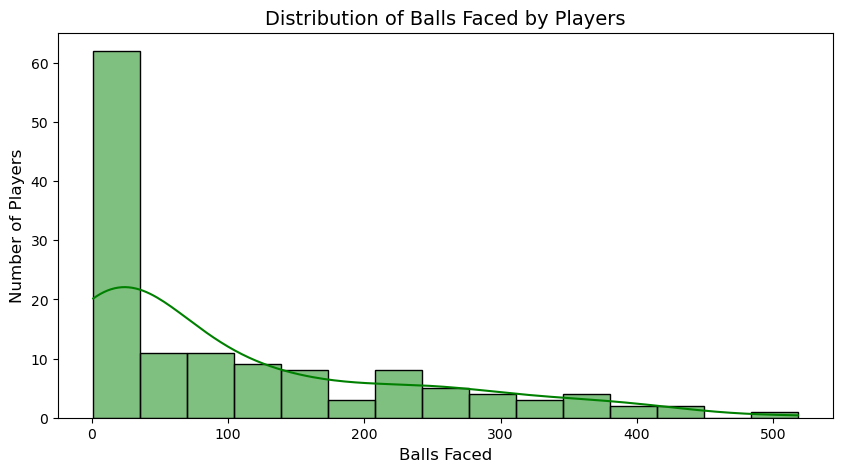

In [431]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Balls faced"], bins=15, kde=True, color="green")
plt.title("Distribution of Balls Faced by Players", fontsize=14)
plt.xlabel("Balls Faced", fontsize=12)
plt.ylabel("Number of Players", fontsize=12)
plt.show()

<font size="5">**Q15. Top 10 players with most runs in a season.**</font>

In [434]:
top_10_run_scorers = df.nlargest(10, "Runs")[["Player", "Runs"]]
print("\nTop 10 players with most runs:")
print(top_10_run_scorers)


Top 10 players with most runs:
             Player  Runs
0          KL Rahul   670
1    Shikhar Dhawan   618
2      David Warner   548
3      Shreyas Iyer   519
4      Ishan Kishan   516
5      Quinton Kock   503
6  Suryakumar Yadav   480
7  Devdutt Padikkal   473
8       Virat Kohli   466
9      ABD Villiers   454


<font size="5">**Q16. Print the players who played the match but didn't get the batting.**</font>

In [437]:
did_not_bat = df[df["Inns"] == 0][["Player", "Matches", "Inns"]]
if did_not_bat.empty:
    print("No players who didn't bat.")
else:
    print("\nPlayers who played but didn’t bat:")
    print(did_not_bat)

No players who didn't bat.


<font size="5">**Q17. Create a new column to show the percentage of total runs scored in 4s and 6s. Then print the top 5 players with maximum percentage.**</font>

In [440]:
df["Boundary_Runs_Percentage"] = ((df["4s"] * 4 + df["6s"] * 6) / df["Runs"]) * 100
top_5_boundary_percent = df.nlargest(5, "Boundary_Runs_Percentage")[["Player", "Boundary_Runs_Percentage"]]
print("\nTop 5 players with highest percentage of runs from boundaries:")
print(top_5_boundary_percent)


Top 5 players with highest percentage of runs from boundaries:
            Player  Boundary_Runs_Percentage
109     Andrew Tye                100.000000
48   Andre Russell                 76.923077
74    Chris Morris                 76.470588
29   Hardik Pandya                 73.309609
47    Sunil Narine                 72.727273


<font size="5">**Q18. Print the players with top 5 Not out percentages (Not Out percentage can be calculated as number of Not outs divided by Innings).**</font>

In [443]:
df["Not Out Percentage"] = (df["Not Out"] / df["Inns"]) * 100
top_5_not_outs = df.nlargest(5, "Not Out Percentage")[["Player", "Not Out Percentage"]]
print(top_5_not_outs)

              Player  Not Out Percentage
62   Gurkeerat Singh               100.0
68   Lockie Ferguson               100.0
93       Imran Tahir               100.0
97     Mohammad Nabi               100.0
105     Pravin Dubey               100.0


<font size="5">**Q19. Create visualization of top 10 players with highest number of sixes.**</font>

C:\Users\under\AppData\Local\Temp\ipykernel_2336\2250726884.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Player", y="6s", data=top_10_six_hitters, palette="magma")


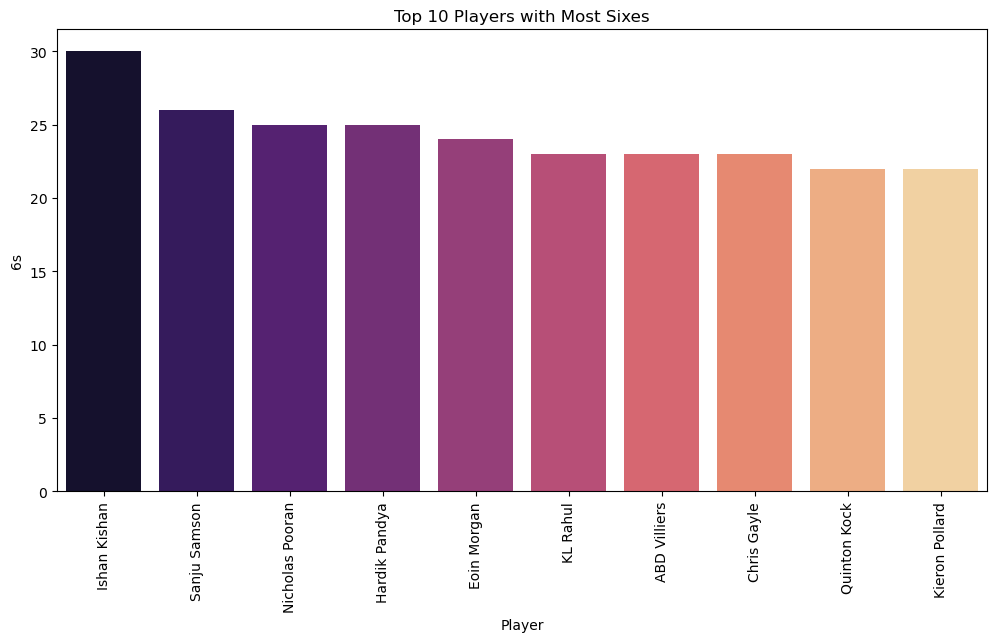

In [446]:
top_10_six_hitters = df.nlargest(10, "6s")[["Player", "6s"]]
plt.figure(figsize=(12, 6))
sns.barplot(x="Player", y="6s", data=top_10_six_hitters, palette="magma")
plt.xticks(rotation=90)
plt.title("Top 10 Players with Most Sixes")
plt.show()

 <font size="5">**Q20. Scatter plot of runs scored by a player v/s balls faced in a season. Then find the relationship between these 2 variables.**</font>

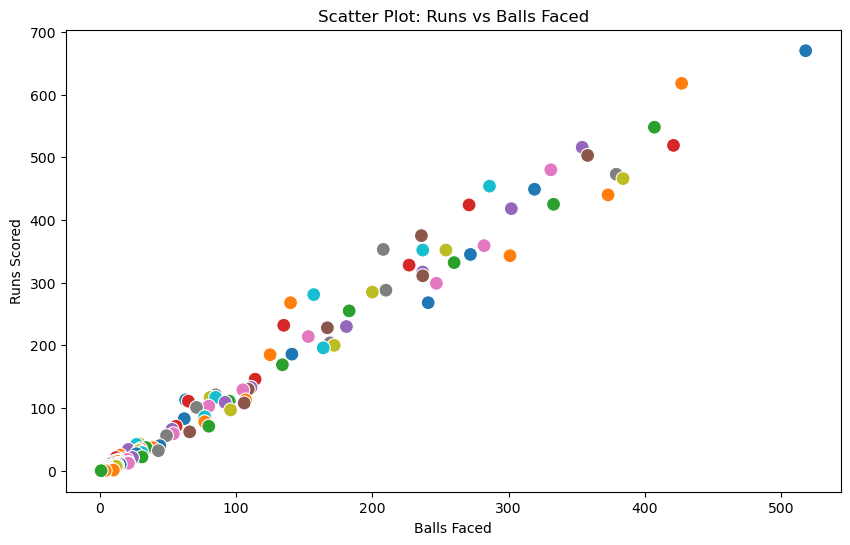

In [449]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Balls faced"], y=df["Runs"], hue=df["Player"], palette="tab10", s=100)
plt.title("Scatter Plot: Runs vs Balls Faced")
plt.xlabel("Balls Faced")
plt.ylabel("Runs Scored")
plt.legend([],[], frameon=False)
plt.show()

<font size="5">The IPL dataset analysis provides valuable insights into player performances across various metrics, including match participation, batting averages, strike rates, and boundary contributions. Through detailed visualizations and statistical evaluations, we identified the top-performing players in terms of runs, centuries, and sixes. Additionally, the analysis highlights players with consistent performances, efficient strike rates, and boundary dominance. The correlation heatmap reveals key relationships between variables, while scatter plots and histograms offer a visual representation of performance distribution. These insights can assist teams, analysts, and strategists in making data-driven decisions for future match strategies and player evaluations.</font>